<a href="https://colab.research.google.com/github/va4756/algio_sklearn/blob/main/bigdata_SDEdu_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 제 2회 합격모의고사 (p472)

## I. 작업형 제1유형

### 문01) airquality데이터를 사용하여 결측치를 포함하는 모든 행을 제거한 후, Ozone 자료에 대한 상위 60%의 분위값을 출력하시오.

In [17]:
# from sklearn.datasets import load_breast_cancer
# import pandas as pd
# import numpy as np
# df = load_breast_cancer()
# df.keys()

In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/airquality.csv', index_col=0)
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [19]:
print(df.shape)
df.info()

(153, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 8.4 KB


In [20]:
df_new = df.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.1 KB


In [21]:
q6 = df_new['Ozone'].quantile(0.4)
print('Ozone의 상위 60%(하위 40%) 사분위 값:', q6)

Ozone의 상위 60%(하위 40%) 사분위 값: 23.0


### 문2) 위의 1번 자료에서 5월 측정자료에서 5월의 Ozone의 평균값이 24.125이다. 이 때, 평균보다 큰 값으로 측정된 일수를 구하시오

In [22]:
df = pd.read_csv('/content/airquality.csv', index_col=0)
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [23]:
df_new = df.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.1 KB


In [24]:
df_new5 = df_new[df_new['Month']==5]
df_new5.shape

(24, 6)

In [25]:
df_Oz_5_mean = df_new5['Ozone'].mean()
df_Oz_5_mean

24.125

In [26]:
result = df_new5[df_new5['Ozone'] >df_Oz_5_mean].Day.count()
print('5월 오존의 평균보다 큰값을 가지는 일 수:', result, '일')

5월 오존의 평균보다 큰값을 가지는 일 수: 8 일


### 문3) 위의 데이터의 컬럼 중에서 결측치가 가장 많은 항목(컬럼)을 출력하시오.

In [27]:
df = pd.read_csv('/content/airquality.csv', index_col=0)
print(df.shape)
df.columns

(153, 6)


Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [28]:
df_non = df.isnull().sum()
df_non

,0
Ozone,37
Solar.R,7
Wind,0
Temp,0
Month,0
Day,0


In [29]:
sort = df_non.sort_values(ascending=False)
sort

,0
Ozone,37
Solar.R,7
Wind,0
Temp,0
Month,0
Day,0


In [30]:
result1 = sort.index[0]
result2 = sort.values[0]
print('결측값이 가장 많은 항목', result1)
print('결측값이 가장 많은 항목의 결측값 개수: ', result2)

결측값이 가장 많은 항목 Ozone
결측값이 가장 많은 항목의 결측값 개수:  37


## II. 작업형 제2유형(p476)

### train_commerce.csv 데이터를 사용하고, 전체 데이터에서 70%를 훈련용 데이터 나머지 30%를 테스트용 데이터로 사용하여고객이 제시간에 도착하는지 여부를 예측하시오

#### 문1 ~ 문4) 독립변수와 종속변수를 문제와 같이 정한다.
#### 문2) 랜덤포레스트 모델을 사용하여 분석모델을 구축한다. 단, 트리의 개수는 n=100으로 지정한다.
#### 문3) 혼동행렬을 사용하여 성능평가지표를 출력하시오.
#### 문4) F1_score, 정확도, 정밀도, 재현율을 구하시오.

In [31]:
# 문1 ~ 문4
import pandas as pd
import numpy as np

df = pd.read_csv('/content/train_commerce.csv', index_col=0)
print(df.shape)
df.head()

(10999, 11)


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [33]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [34]:
df = df.dropna()

In [35]:
# 독립변수
print(df['Warehouse_block'].unique())
print(df['Mode_of_Shipment'].unique())
print(df['Product_importance'].unique())
print(df['Gender'].unique())
#df['Warehouse_block'].value_counts()

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [36]:
# 독립변수
columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

unique_dict = {col: df[col].unique() for col in columns}
for key, value in unique_dict.items():
    print(f'{key}: {value}\n')

Warehouse_block: ['D' 'F' 'A' 'B' 'C']

Mode_of_Shipment: ['Flight' 'Ship' 'Road']

Product_importance: ['low' 'medium' 'high']

Gender: ['F' 'M']



In [37]:
# # 종속변수
# df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')

In [38]:
# X = df.drop('Reached.on.Time_Y.N', axis='columns').to_numpy()
# y = df['Reached.on.Time_Y.N'].to_numpy()

Accuracy: 0.6582
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.67      0.61      1322
           1       0.75      0.65      0.69      1978

    accuracy                           0.66      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.66      0.66      3300

Confusion Matrix:
 [[ 889  433]
 [ 695 1283]]


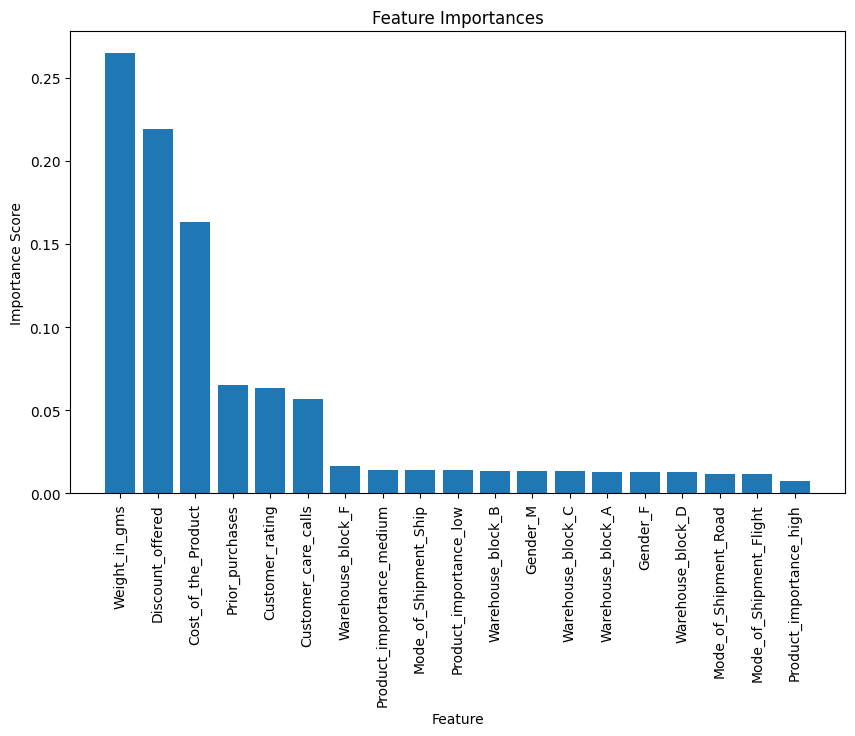

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')

X = df.drop('Reached.on.Time_Y.N', axis='columns')
y = df['Reached.on.Time_Y.N']

# 범주형 변수 One-Hot Encoding (필요한 경우)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))  # 범주형 변수 변환
X_numeric = X.select_dtypes(exclude=['object']).values  # 숫자형 변수 그대로 유지
X_final = np.hstack((X_numeric, X_encoded))  # 변환된 데이터 결합

# (2) 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=123)

# (3) 모델 학습
rfc = RandomForestClassifier(n_estimators=100, random_state=123)
rfc.fit(X_train, y_train)

# (4) 예측 및 평가
y_pred = rfc.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 정밀한 평가 지표 출력
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# (5) 특성 중요도 시각화 (선택)
import matplotlib.pyplot as plt

feature_names = list(X.select_dtypes(exclude=['object']).columns) + list(encoder.get_feature_names_out())
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

## III. 작업형 제3유형(p480)

### 문1) height.csv 에서 해당치료가 효과가 있는지를 상체표본 t-검정을 사용하여 증명하시오.

#### (1) 뮤디의 표본평균을 구하시오(소수 둘째자리까지 계산).

In [43]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('/content/height.csv', index_col=0)
print(df.shape)
df.head()

(22, 4)


,sex,age,h_before,h_after
student,,,,
1,Male,5,117,121
2,Male,5,108,109
3,Male,6,105,106
4,Male,5,89,114
5,Male,5,101,103


In [44]:
df.columns

Index(['sex', 'age', 'h_before', 'h_after'], dtype='object')

In [48]:
print('치료 전의 키의 평균: ', df['h_before'].mean())
print('치료 후의 키의 평균: ', df['h_after'].mean())

치료 전의 키의 평균:  104.77272727272727
치료 후의 키의 평균:  115.04545454545455


In [51]:
res = round((df['h_after'].mean() - df['h_before'].mean()), 2)
print('뮤디의 표본평균: ', res)

뮤디의 표본평균:  10.27


#### (2) 위의 가설을 증명하기 위한 검정통계량을 구하시오(반올림하여 소수 셋째자리까지 계산).

In [56]:
t, pval = stats.ttest_ind(df['h_after'], df['h_before'], alternative='greater')
print(t, pval)

2.016930907527647 0.02506246321308522


In [59]:
# 검정통계량: t
print('검정통계량: ', round(t, 3))

검정통계량:  2.017


#### (3) 위의 통계량에 대한 p-값을 구하고 (반올림하여 소수 넷째자리까지 계산), 유의수준 0.05하에서 가설 검정의 결과로 (귀무가설 채택/기각) 중 하나를 선택하시오.

In [60]:
pval = round(pval, 4)
print('p-value: ', pval)
alpha = 0.05
if pval < alpha:
    print('귀무가설 기각')
else:
    print('귀무가설 채택')

p-value:  0.0251
귀무가설 기각


### 문2) recordmath.csv 데이터는 고등학생들의 방과후 특별과외에 대한 수학성적과 다니는 학원과의 관계에 대한 데이터이다

#### (1) 학원에 다니는 (academy=1) 학생으로 분류된 남학생과 여학생의 비율을 소숫점 이하 둘째자리까지 출력하시오.

In [63]:
df = pd.read_csv('/content/recordmath.csv', index_col=0)
print(df.shape)
df.head()

(30, 5)


,sex,age,r_before,r_after,academy
student,,,,,
1,Male,16,35,67,0
2,Male,16,50,72,1
3,Male,16,90,94,1
4,Male,16,78,91,1
5,Male,16,23,41,0


In [64]:
df.columns

Index(['sex', 'age', 'r_before', 'r_after', 'academy'], dtype='object')

#### (2) 성별에 따른 academy의 비율에 차이가 있는지를 검정하기 위한 카이제곱 검정통계량을 반올림하여 소숫점 셋째자리까지 구하시오.

#### (3) 위의 통계량에 대한 p-value(유의확률)을 소숫점 넷째지리까지 출력하고, 유의수준 5% 하에서 가설검정의 결과로 (귀무가설 채택/기각) 중 하나를 선탣하시오.